# Functional Python
___

This is a very simple tutorial on how to use Python (3) in a functional style. The main idea is to provide some algorithms implemented in imperative and functional style, and then have some exercises to practice functional Python.

In [3]:
from time import time
from math import sqrt
from math import e
from math import pi
from functools import reduce
from operator import mul
from numpy import sin, arange, cos
import matplotlib.pyplot as plt
from multiprocessing import Pool
%matplotlib notebook

This is a very basic introduction to functional programming. If you want to know more about functional programming [this](https://wiki.haskell.org/Functional_programming) is a good place to start.

The main idea in functional programming is to focus on *functions* instead of *instructions*. So you write functions that tell the computer **what** to do with the data, instead of telling the computer **how** to do it.

## Higher-order functions
---

Higher-order functions are functions that can accept other functions as their input, and use it to transform the data that they receive. A very good example is the [`map`](https://docs.python.org/3/library/functions.html#map) function in python. `map` has two inputs, one is a function and the other one is an iterable (an object on which you can iterate). `map` applies the function to each of the entries of the iterable and returns a new iterable with the each output.

In the following example, we have a list of numbers, and we want to compute the absolute value of each of them. Calculating the absolute value of a number in Python is very easy with the [`abs`](https://docs.python.org/3/library/functions.html#abs) function. 

In [2]:
numbers = [1, 6, -5, -6, 67, 2**4, (4+9-55)]
list(map(abs, numbers))

[1, 6, 5, 6, 67, 16, 42]

## Lambda abstractions
---
The lambda abstractions are used when you want to define simple functions that are going to be used only one time. They are normally used with Higher-order functions. Let's say that you want to compute the square of a list of numbers. One way to do it is to create a simple function that sqares its input and use `map` over the list of numbers:

In [3]:
list(map(lambda x: x**2, numbers))

[1, 9, 25, 36, 4624, 256, 1764]

## List comprehensions
---
It is very common to work with lists (*or iterable types in general*) in functional programming. Although list comprehensions are not strictly functional programming, they are a very usefull tool when working in this paradigm. Let's say that you want to generate a list with the sqareroots of the first 10 natural numbers, rounded to only 2 decimal places, here is how you can do that with list comprehensions. For more info go [here](https://docs.python.org/3/tutorial/datastructures.html#list-comprehensions)

In [4]:
[round(sqrt(x), 2) for x in range(10)]

[0.0, 1.0, 1.41, 1.73, 2.0, 2.24, 2.45, 2.65, 2.83, 3.0]

## Generators
---

A generator is a function that `yields` a result every time it is called. So instead of returning a list of values, you can return a function that generates those values. We call this type of behaviour to be **lazy**, because it doesn't compute all the results at once, but rather it *yields* a new result every time is asked to do so. For example `map` is a generator. One can use a very similar syntax for generator as we did for list comprehensions. For more info go [here](https://wiki.python.org/moin/Generators)

Here is an example of a generator of root squares:

In [5]:
(round(sqrt(x), 2) for x in range(10))

<generator object <genexpr> at 0x7fe0397c4cf0>

Now, if we want to obtain the values the generator is generatin, one can use the `list` function. This function turns any iterable into a list.

In [6]:
list((round(sqrt(x), 2) for x in range(10)))

[0.0, 1.0, 1.41, 1.73, 2.0, 2.24, 2.45, 2.65, 2.83, 3.0]

## Recursion
---
Recursion is a super-useful tool when working with functions. They let you express iterative behaviour without loops. Some functional langages (like [Haskell](https://www.haskell.org/)) don't even have loops, so the only way to define iteration is through recursion. Here we are going to define the `factorial` function from its formal mathematical recursive definition.

**Warning**: Although recursion is super useful you should be carefull when using it in Python.

In [7]:
def factorial(n):
    if n==0:
        return 1
    else:
        return n * factorial(n-1)
    
manual = 1*2*3*4*5
from_function = factorial(5)
print(manual, from_function)

120 120


## Creating our own Higher-order function

Higher order functions are essential in functional programming, we have used many so far: `map`, `reduce`, `filter`. The next is to create of our own. 

For this exercise we are going to create a derivator. Where is the definition of the derivative at a point $x_0$. It is possible to obtain the derivative of $f$ if we calculate this limit at every point.

$\frac{df(x_0)}{dx}=\lim\limits_{\delta \rightarrow 0} \frac{f(x_0+\delta)-f(x_0)}{\delta}$

In [4]:
def diff(f, x, delta=1e-06):
    return (f(x+delta)-f(x))/delta

Now let's see our derivative in action

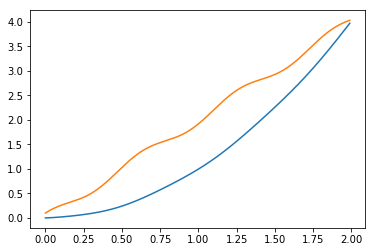

In [8]:
def g(x):
    return x**2 + 0.01*sin(10*x)

x_range = arange(0,2,0.01)
y = [g(x) for x in x_range]
y_d = [diff(g, x) for x in x_range]
fig = plt.figure(0)
line_original, line_differentiated = plt.plot(x_range, y, x_range, y_d)

#### Creating a true derivative
Our function `diff` is able to calculate the derivative of a function at a certain point. So it takes a function as an input but returns a number. But what happens if we want to calculate the derivative (as a function). For this we want a HOF that takes as parameter a function and returns a functions that is the derivative.

$D(f) = \lim\limits_{\delta\rightarrow 0} \frac{f(x-\delta)-f(x)}{\delta}$

In [6]:
def derivative(f, delta=1e-06):
    return lambda x: (f(x+delta) - f(x))/delta

Notice How we take a function as an input and return a function as an output (the lambda expression is a function). Because we are calculating the derivative at all points, it is not required to pass `x` as a parameter. Now let's see our derivative in action 

In [7]:
type(diff(g, 0))

numpy.float64

In [8]:
type(derivative(g))

function

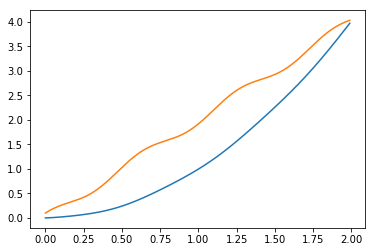

In [9]:
y = list(map(g, x_range))
y_d = list(map(derivative(g), x_range))
fig = plt.figure(1)
line_original,line_derivated = plt.plot(x_range, y, x_range, y_d)

<IPython.core.display.Javascript object>


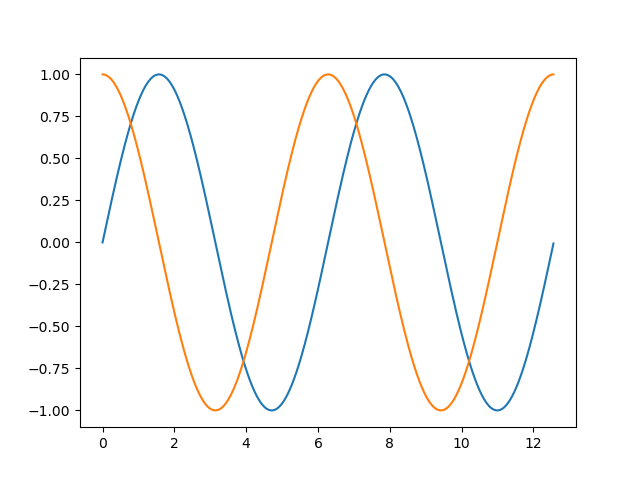

In [12]:
plt.figure(2)
x_range = arange(0, 4*pi, 0.01)
plt.plot(x_range, sin(x_range), x_range, list(map(derivative(sin), x_range)))